##### Contributors: Md Shahidur Rahaman, Md Showkat Hossain Chy

#### Inspiration: We have inspired from the 
####    1. Repository example: https://github.com/jaorduz/QNLP/blob/main/notebook/example_5.ipynb
####    2. Prepositional-phrase-rule: https://cqcl.github.io/lambeq/examples/rewrite.html#Prepositional-phrase-rule

In [2]:
from lambeq import BobcatParser

#### Initializating Sentence

In [3]:
sentence = 'Showkat and Shahidur are enjoying QNLP.'

In [4]:
parser = BobcatParser(verbose='text') #Constructing a diagram for the above sentence.
diagram = parser.sentence2diagram(sentence)

In order to create an ```IQPAnsatz``` instance, we need to define the number of qubits for all atomic types that occur in the diagram – in this case, 
for the noun type and the sentence type. The following code produces a circuit by assigning 1 qubit to the noun type and 1 qubit to the sentence type. 
Further, the number of IQP layers ```(n_layers)``` is set to 2.

In [5]:
from lambeq import AtomicType, IQPAnsatz

#### We are defining atomic types in below code block. 
##### i.e. a qubit for noun and another for the sentence.

In [6]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

In [7]:
 N.__dict__ # Here N refers to the Ty('n') i.e Noun object which can be viewed by __dict__

{'_value_': 'n',
 '_name_': 'NOUN',
 '__objclass__': <enum 'AtomicType'>,
 '_objects': (Ob('n'),),
 '_z': 0,
 '_name': 'n'}

In [8]:
S.__dict__ # Here N refers to the Ty('s') i.e Sentence object which can be viewed by __dict__ 

{'_value_': 's',
 '_name_': 'SENTENCE',
 '__objclass__': <enum 'AtomicType'>,
 '_objects': (Ob('s'),),
 '_z': 0,
 '_name': 's'}

- Convert string diagram to quantum circuit

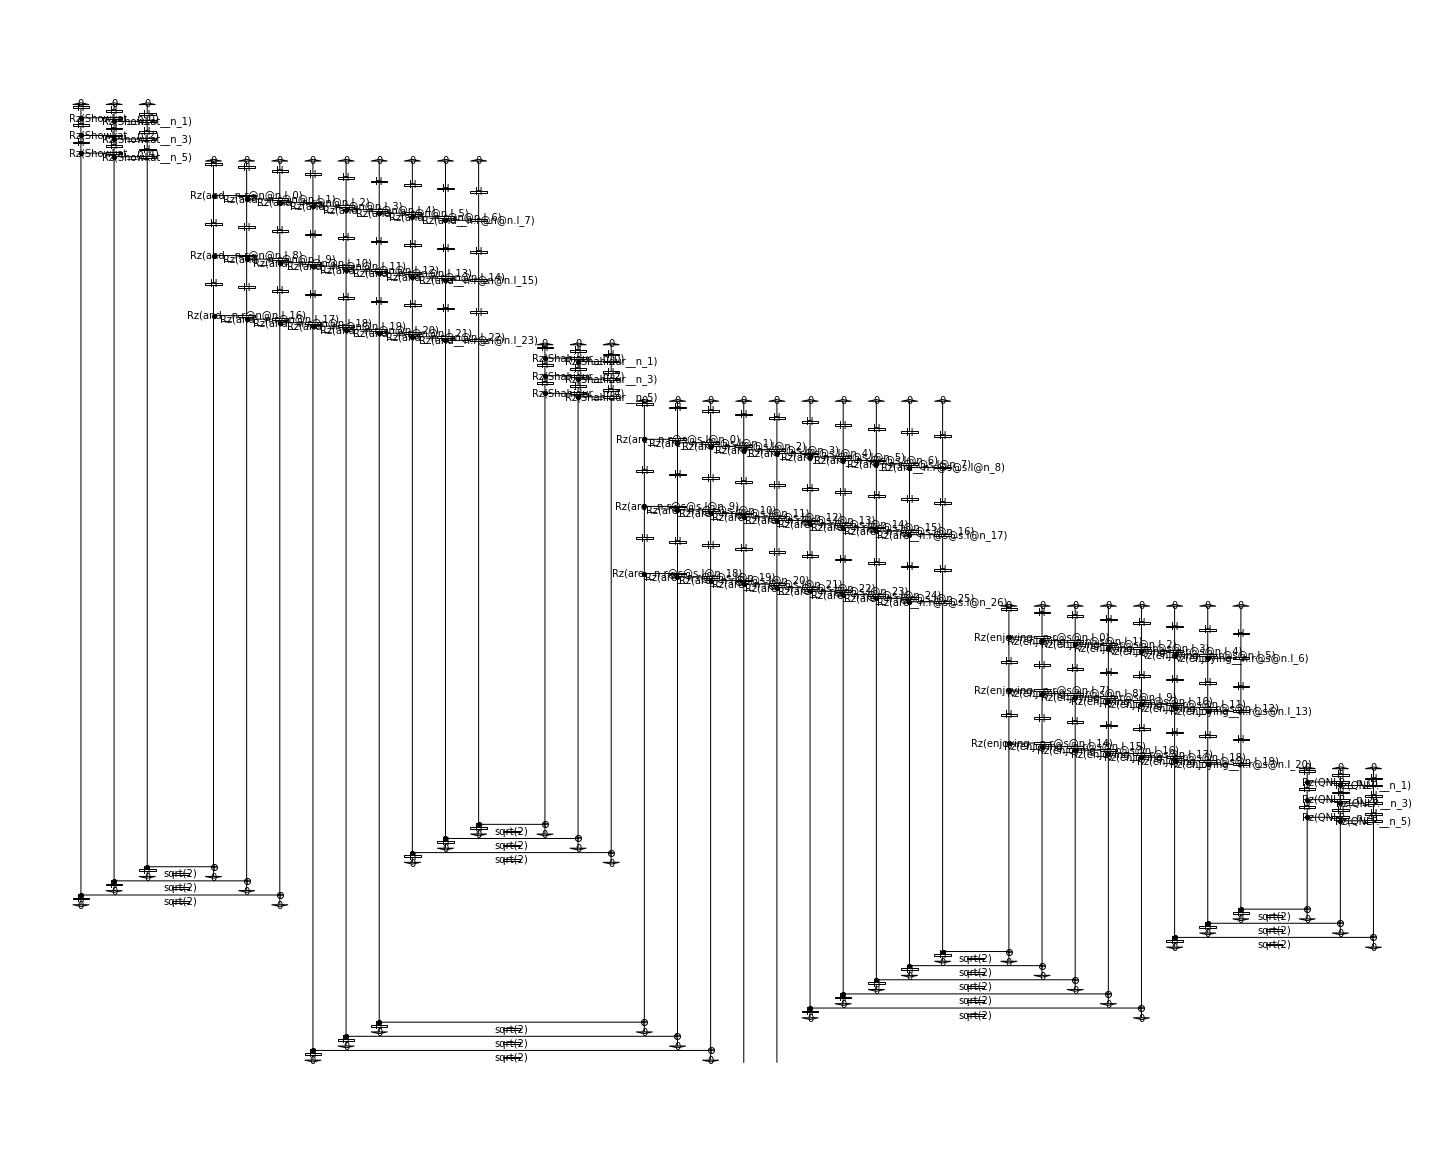

In [9]:
ansatz = IQPAnsatz({N: 3, S: 2}, n_layers=3) # Here, we are initializing the parameters IQPAnsatz function(For example, If n = 1, returns IQPAnsatz an Euler decomposition; otherwise, builds an IQP ansatz on n qubits.) 
discopy_circuit = ansatz(diagram) # 

# print(type(discopy_circuit)) # returns a <class 'discopy.quantum.circuit.Circuit'> 
# print(discopy_circuit.__dict__) # This Circuit object has many properties such as _layers, _offset, _dom etc. 
discopy_circuit.draw(figsize=(20,16))

In [10]:

from pytket.circuit.display import render_circuit_as_html

In [11]:
tket_circuit = discopy_circuit.to_tk()

In [12]:
temp = render_circuit_as_html(tket_circuit) # It seems sometimes the diagram generated by render_circuit_jupyter function can not viewed fully in Jupyter
                                            # "render_circuit_as_html" function can help in this regard, below code will generate a HTML file to view the diagram in a Web View  
with open("diagram.html", "w") as text_file:
    text_file.write(temp)
# print(type(temp))

In [14]:
from pytket.extensions.qiskit import tk_to_qiskit
qiskit_circuit = tk_to_qiskit(tket_circuit)
qiskit_circuit.draw()

┌───┐                                               ┌───┐              »
 q_0: ┤ H ├────────────────■──────────────────────────────┤ H ├──────────────»
      ├───┤     ┌──────────┴───────────┐                  └───┘              »
 q_1: ┤ H ├─────┤ Rz(2*π*Showkat__n_0) ├────────────────────■────────────────»
      ├───┤     └──────────────────────┘         ┌──────────┴───────────┐    »
 q_2: ┤ H ├──────────────────────────────────────┤ Rz(2*π*Showkat__n_1) ├────»
      ├───┤                                      └────────┬───┬─────────┘    »
 q_3: ┤ H ├────────────────■──────────────────────────────┤ H ├──────────────»
      ├───┤   ┌────────────┴─────────────┐                └───┘              »
 q_4: ┤ H ├───┤ Rz(2*π*and__n.r@n@n.l_0) ├──────────────────■────────────────»
      ├───┤   └──────────────────────────┘     ┌────────────┴─────────────┐  »
 q_5: ┤ H ├────────────────────────────────────┤ Rz(2*π*and__n.r@n@n.l_1) ├──»
      ├───┤                                    └──────────────────────────┘  »
 q_6: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
 q_7: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
 q_8: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
 q_9: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_10: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_11: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                               ┌───┐              »
q_12: ┤ H ├────────────────■──────────────────────────────┤ H ├──────────────»
      ├───┤    ┌───────────┴───────────┐                  └───┘              »
q_13: ┤ H ├────┤ Rz(2*π*Shahidur__n_0) ├────────────────────■────────────────»
      ├───┤    └───────────────────────┘        ┌───────────┴───────────┐    »
q_14: ┤ H ├─────────────────────────────────────┤ Rz(2*π*Shahidur__n_1) ├────»
      ├───┤                                     └─────────┬───┬─────────┘    »
q_15: ┤ H ├────────────────■──────────────────────────────┤ H ├──────────────»
      ├───┤  ┌─────────────┴──────────────┐               └───┘              »
q_16: ┤ H ├──┤ Rz(2*π*are__n.r@s@s.l@n_0) ├─────────────────■────────────────»
      ├───┤  └────────────────────────────┘   ┌─────────────┴──────────────┐ »
q_17: ┤ H ├───────────────────────────────────┤ Rz(2*π*are__n.r@s@s.l@n_1) ├─»
      ├───┤                                   └────────────────────────────┘ »
q_18: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_19: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_20: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_21: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_22: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_23: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                                                  »
q_24: ┤ H ├──────────────────────────────────────────────────────────────────»
      ├───┤                                             

In [15]:
render_circuit_jupyter(tket_circuit) ## We can view the circuit diagram in Jupyter using this method.

##### We are using this code block from:  https://cqcl.github.io/lambeq/examples/rewrite.html#Prepositional-phrase-rule
#### The below function can generate different types of diagram for such as Cup, Box.

In [16]:
from discopy import grammar
from discopy.rewriting import InterchangerError

def draw(diagram):
    for i, box in enumerate(diagram.boxes):
        if isinstance(box, Word):
            for j in reversed(range(i)):
                if isinstance(diagram.boxes[j], Word):
                    break

                try:
                    diagram = diagram.interchange(j, j+1)
                except InterchangerError:
                    diagram.draw()
                    return
        elif not isinstance(box, Cup):
            diagram.draw()
            return
    grammar.draw(diagram)

#### Pregroup form syntactic derivations can become highly intricate, resulting in excessive hardware resource consumption and long training times. The rewrite module aims to give the user a way to solve some of these issues by using rewriting rules to make the string diagram easier to understand.

#### This is an example of using prepositional based rule in sentences which also tells more about the Rewriter function of lambeq

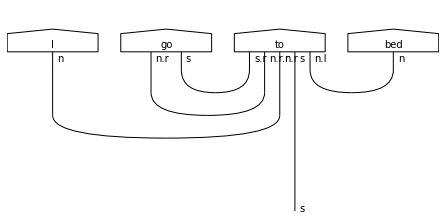

↓ rewriting (prepositional phrase rule)


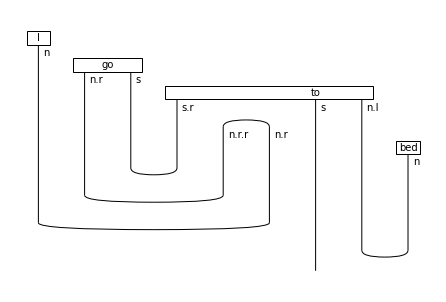

↓ normal form


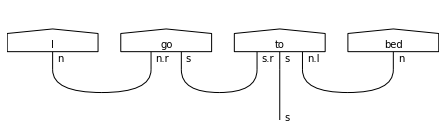

In [17]:
from discopy import Word
from discopy.rigid import Cup, Diagram, Id, cups

from lambeq import Rewriter
rewriter = Rewriter()



cod = (N >> S) >> (N >> S << N)
diagram = ((Word('I', N) @ Word('go', N >> S) @ Word('to', cod) @
            Word('bed', N)) >>
           Diagram.cups(cod[:3].l, cod[:3]) @ Id(S) @ Cup(N.l, N))
draw(diagram)
print('↓ rewriting (prepositional phrase rule)')
draw(Rewriter(['prepositional_phrase'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

# Package versions<a name="packages"></a>

In [18]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

python version:  3.9.12
pytket version:  1.1.0
qiskit version:  0.20.1


# Bibliography<a name="references"></a>

[1] [Discopy](https://github.com/oxford-quantum-group/discopy)

[2] [QNLP tutorial](https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html)

<!--
# Things to install<a name="install"></a>

Nest lines seem needed.


```python
!pip install pytket-qiskit 
!pip install pytket 
!pip install qiskit 
!pip3 install pytket-pyzx
```
-->